## HW2：函数计算（ddl：10.5）
你的名字：

你的学号：

## 注意：
1. 请使用 Python 语言完成所有编程作业。
2. 允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接复制粘贴由人工智能生成的代码。
3. 请直接在题干后附加代码块和必要的公式，讨论等。
4. 作图请包含 X,Y 轴的标签，以及必要的图例。过多信息的缺失可能会导致丢分。

作业只需要在这个 jupyter notebook 里添加代码，并直接提交修改后的 jupyter notebook，文件请重命名为`姓名-学号-作业x`。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程；另外标注**致谢**，借助了**哪位同学或 ChatGPT 等工具**的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！

### **一、两种自动微分模式的比较**

<font color='red'>本题禁用Jax、PyTorch等自带自动微分功能的库</font>

课程讲义中通过计算一个一元单值函数的例子分别介绍了向前模式与向后模式自动微分的概念。在这一情况下两种模式是基本等价的，没有明显的优劣之分；但在神经网络等“多对多”的场景下未必如此。本题希望通过在两个简单场景中的实践，比较不同情形下向前模式与向后模式各自的优劣。

请注意：
1. 本题的核心在于同一场景下向前/向后模式之间的比较，为了确保结论的有效性以及节约时间起见，请同学们尽量以简洁且一致的方式处理每个小问中的各种细节！
2. 在本题中，如果你觉得单次计算所需时间太少或波动较大，可以设定一个循环次数，使每一小题中的程序都重复循环这一次数（结果只需输出一次）后再输出总耗时。

#### **1.二维标量场**

在一个二维平面上有三个标量场，它们都是坐标$(x_1,x_2)$的函数，形式分别为：
$$ f_1=(x_1^2+x_2^2)\sin^2 x_2\cos(x_1x_2),\quad f_2=e^{x_1^2+x_2^2}-4\sin^2 x_2, \quad f_3=\sin^2x_2+2(x_1^2+x_2^2) +\cos(x_1x_2)  $$

我们令$a=x_1^2+x_2^2,\quad b=\sin^2 x_2,\quad c=\cos(x_1x_2)$（$e^x$等简单的函数形式不必额外引入中间变量）。这样一来，三个标量场的梯度$\frac{\partial f_i}{\partial x_j}$均能以中间变量a，b，c的值及导数值为媒介求出。

* 基于向前模式的思路编写出两个函数：分别在输入任意坐标$(x_1,x_2)$后，可以输出沿着对应方向$x_j(j=1,2)$的三个标量场的梯度分量$(\frac{\partial f_1}{\partial x_j},\frac{\partial f_2}{\partial x_j},\frac{\partial f_3}{\partial x_j})$；随后用它们计算并输出三个标量场在$(5,10)$点处的梯度，同时借助`time`包的`time()`函数两次调用的时间差，获取并输出计算所花费的总时间。

In [1]:
import time
import numpy
import matplotlib.pyplot as plot


repeat_times = 10000

def forward_x1(x1: float, x2: float):
    x1_dot = 1
    x2_dot = 0
    a: float = numpy.power(x1, 2) + numpy.power(x2, 2)
    a_dot: float = 2 * x1 * x1_dot + 2 * x2 * x2_dot
    b: float = numpy.power(numpy.sin(x2), 2)
    b_dot: float = 2 * numpy.sin(x2) * numpy.cos(x2) * x2_dot
    c: float = numpy.cos(x1 * x2)
    c_dot: float = -numpy.sin(x1 * x2) * x2 * x1_dot - numpy.sin(x1 * x2) * x1 * x2_dot
    f1 = a * b * c
    f1_dot = a * b * c_dot + a * b_dot * c + a_dot * b * c
    f2 = numpy.exp(a) - 4 * b
    f2_dot = numpy.exp(a) * a_dot - 4 * b_dot
    f3 = 2 * a + b + c
    f3_dot = 2 * a_dot + b_dot + c_dot
    return [float(f1_dot), float(f2_dot), float(f3_dot)]


def forward_x2(x1: float, x2: float):
    x1_dot = 0
    x2_dot = 1
    a: float = numpy.power(x1, 2) + numpy.power(x2, 2)
    a_dot: float = 2 * x1 * x1_dot + 2 * x2 * x2_dot
    b: float = numpy.power(numpy.sin(x2), 2)
    b_dot: float = 2 * numpy.sin(x2) * numpy.cos(x2) * x2_dot
    c: float = numpy.cos(x1 * x2)
    c_dot: float = -numpy.sin(x1 * x2) * x2 * x1_dot - numpy.sin(x1 * x2) * x1 * x2_dot
    f1 = a * b * c
    f1_dot = a * b * c_dot + a * b_dot * c + a_dot * b * c
    f2 = numpy.exp(a) - 4 * b
    f2_dot = numpy.exp(a) * a_dot - 4 * b_dot
    f3 = 2 * a + b + c
    f3_dot = 2 * a_dot + b_dot + c_dot
    return [float(f1_dot), float(f2_dot), float(f3_dot)]


time_forward1 = time.time_ns()
nabla_x1 = None
nabla_x2 = None
for i in range(repeat_times):
    nabla_x1 = forward_x1(5, 10)
    nabla_x2 = forward_x2(5, 10)
print(f"∂_x1 f1, ∂_x1 f2, ∂_x1 f3 = {nabla_x1}\n∂_x2 f1, ∂_x2 f2, ∂_x2 f3 = {nabla_x2}")
time_forward2 = time.time_ns()
time_forward_s = (time_forward2 - time_forward1) / 1000000000.0
print(time_forward_s)


∂_x1 f1, ∂_x1 f2, ∂_x1 f3 = [99.92114253280238, 1.9355760420357227e+55, 22.623748537039287]
∂_x2 f1, ∂_x2 f2, ∂_x2 f3 = [164.36457063461188, 3.8711520840714454e+55, 42.22481951924727]
1.7582037


* 基于向后模式的思路编写出三个函数：分别在输入任意坐标$(x_1,x_2)$后，可以输出对应标量场$f_i(i=1,2,3)$的梯度$(\frac{\partial f_i}{\partial x_1},\frac{\partial f_i}{\partial x_2})$；随后用它们计算并输出三个标量场在$(5,10)$点处的梯度，用同样的方法输出计算所花总时间。

In [2]:
def backward_f1(x1: float, x2: float):
    f1_bar = 1
    f2_bar = 0
    f3_bar = 0
    a: float = numpy.power(x1, 2) + numpy.power(x2, 2)
    b: float = numpy.power(numpy.sin(x2), 2)
    c: float = numpy.cos(x1 * x2)
    f1 = a * b * c
    f2 = numpy.exp(a) - 4 * b
    f3 = 2 * a + b + c
    a_bar = b * c * f1_bar + numpy.exp(a) * f2_bar + 2 * f3_bar
    b_bar = a * c * f1_bar - 4 * f2_bar + f3_bar
    c_bar = a * b * f1_bar + f3_bar
    x1_bar = 2 * x1 * a_bar - numpy.sin(x1 * x2) * x2 * c_bar
    x2_bar = 2 * x2 * a_bar + 2 * numpy.sin(x2) * numpy.cos(x2) * b_bar - numpy.sin(x1 * x2) * x1 * c_bar
    return [float(x1_bar), float(x2_bar)]


def backward_f2(x1: float, x2: float):
    f1_bar = 0
    f2_bar = 1
    f3_bar = 0
    a: float = numpy.power(x1, 2) + numpy.power(x2, 2)
    b: float = numpy.power(numpy.sin(x2), 2)
    c: float = numpy.cos(x1 * x2)
    f1 = a * b * c
    f2 = numpy.exp(a) - 4 * b
    f3 = 2 * a + b + c
    a_bar = b * c * f1_bar + numpy.exp(a) * f2_bar + 2 * f3_bar
    b_bar = a * c * f1_bar - 4 * f2_bar + f3_bar
    c_bar = a * b * f1_bar + f3_bar
    x1_bar = 2 * x1 * a_bar - numpy.sin(x1 * x2) * x2 * c_bar
    x2_bar = 2 * x2 * a_bar + 2 * numpy.sin(x2) * numpy.cos(x2) * b_bar - numpy.sin(x1 * x2) * x1 * c_bar
    return [float(x1_bar), float(x2_bar)]


def backward_f3(x1: float, x2: float):
    f1_bar = 0
    f2_bar = 0
    f3_bar = 1
    a: float = numpy.power(x1, 2) + numpy.power(x2, 2)
    b: float = numpy.power(numpy.sin(x2), 2)
    c: float = numpy.cos(x1 * x2)
    f1 = a * b * c
    f2 = numpy.exp(a) - 4 * b
    f3 = 2 * a + b + c
    a_bar = b * c * f1_bar + numpy.exp(a) * f2_bar + 2 * f3_bar
    b_bar = a * c * f1_bar - 4 * f2_bar + f3_bar
    c_bar = a * b * f1_bar + f3_bar
    x1_bar = 2 * x1 * a_bar - numpy.sin(x1 * x2) * x2 * c_bar
    x2_bar = 2 * x2 * a_bar + 2 * numpy.sin(x2) * numpy.cos(x2) * b_bar - numpy.sin(x1 * x2) * x1 * c_bar
    return [float(x1_bar), float(x2_bar)]


time_backward1 = time.time_ns()
nabla_f1 = None
nabla_f2 = None
nabla_f3 = None
for i in range(repeat_times):
    nabla_f1 = backward_f1(5, 10)
    nabla_f2 = backward_f2(5, 10)
    nabla_f3 = backward_f3(5, 10)
print(f"∂_x1 f1, ∂_x2 f1 = {nabla_f1}\n∂_x1 f2, ∂_x2 f2 = {nabla_f2}\n∂_x1 f3, ∂_x2 f3 = {nabla_f3}")
time_backward2 = time.time_ns()
time_backward_s = (time_backward2 - time_backward1) / 1000000000.0
print(time_backward_s)


∂_x1 f1, ∂_x2 f1 = [99.92114253280238, 164.36457063461188]
∂_x1 f2, ∂_x2 f2 = [1.9355760420357227e+55, 3.8711520840714454e+55]
∂_x1 f3, ∂_x2 f3 = [22.623748537039287, 42.22481951924727]
3.0684144


* 两种模式所需时间的相对大小如何？

<div style="border: 2px solid black; padding: 10px;">
不难发现向前微分模式所需时间较短。
</div>

#### **2.多元回归模型** 

通常把一个因变量与多个自变量之间的回归分析称为多元回归。假如我们得到了一个如下关于$\textbf{X}=(x_1,x_2,x_3,x_4)$的四元回归表达式：

$$ F=\ln(x_1x_2) + \sin \frac{x_2}{x_3} + x_1^3x_3^2x_4$$

我们只考虑在实数域中有意义的运算，这里引入中间变量：$a=\ln(x_1x_2),\quad b=\sin \frac{x_2}{x_3},\quad c=x_1^3x_3^2x_4$。

* 基于向前模式的思路编写出四个函数：输入$\textbf{X}$，分别输出$\frac{\partial F}{\partial x_j}(j=1,2,3,4)$；随后用它们计算并输出在$\textbf{X}=(2,4,6,9)$点处时$F$在参数空间中的梯度：$(\frac{\partial F}{\partial x_1}, \frac{\partial F}{\partial x_2}, \frac{\partial F}{\partial x_3}, \frac{\partial F}{\partial x_4})$，输出计算所花费的总时间。

In [3]:
def forward_x1(x1: float, x2: float, x3: float, x4: float):
    x1_dot = 1
    x2_dot = 0
    x3_dot = 0
    x4_dot = 0
    a: float = numpy.log(x1 * x2)
    a_dot: float = 1 / x1 * x1_dot + 1 / x2 * x2_dot
    b: float = numpy.sin(x2 / x3)
    b_dot: float = numpy.cos(x2 / x3) / x3 * x2_dot - numpy.cos(x2 / x3) * x2 / numpy.power(x3, 2) * x3_dot
    c: float = numpy.power(x1, 3) * numpy.power(x3, 2) * x4
    c_dot: float = 3 * numpy.power(x1, 2) * numpy.power(x3, 2) * x4 * x1_dot + 2 * numpy.power(x1, 3) * x3 * x4 * x3_dot + numpy.power(x1, 3) * numpy.power(x3, 2) * x4_dot
    f = a + b + c
    f_dot = a_dot + b_dot + c_dot
    return float(f_dot)


def forward_x2(x1: float, x2: float, x3: float, x4: float):
    x1_dot = 0
    x2_dot = 1
    x3_dot = 0
    x4_dot = 0
    a: float = numpy.log(x1 * x2)
    a_dot: float = 1 / x1 * x1_dot + 1 / x2 * x2_dot
    b: float = numpy.sin(x2 / x3)
    b_dot: float = numpy.cos(x2 / x3) / x3 * x2_dot - numpy.cos(x2 / x3) * x2 / numpy.power(x3, 2) * x3_dot
    c: float = numpy.power(x1, 3) * numpy.power(x3, 2) * x4
    c_dot: float = 3 * numpy.power(x1, 2) * numpy.power(x3, 2) * x4 * x1_dot + 2 * numpy.power(x1, 3) * x3 * x4 * x3_dot + numpy.power(x1, 3) * numpy.power(x3, 2) * x4_dot
    f = a + b + c
    f_dot = a_dot + b_dot + c_dot
    return float(f_dot)


def forward_x3(x1: float, x2: float, x3: float, x4: float):
    x1_dot = 0
    x2_dot = 0
    x3_dot = 1
    x4_dot = 0
    a: float = numpy.log(x1 * x2)
    a_dot: float = 1 / x1 * x1_dot + 1 / x2 * x2_dot
    b: float = numpy.sin(x2 / x3)
    b_dot: float = numpy.cos(x2 / x3) / x3 * x2_dot - numpy.cos(x2 / x3) * x2 / numpy.power(x3, 2) * x3_dot
    c: float = numpy.power(x1, 3) * numpy.power(x3, 2) * x4
    c_dot: float = 3 * numpy.power(x1, 2) * numpy.power(x3, 2) * x4 * x1_dot + 2 * numpy.power(x1, 3) * x3 * x4 * x3_dot + numpy.power(x1, 3) * numpy.power(x3, 2) * x4_dot
    f = a + b + c
    f_dot = a_dot + b_dot + c_dot
    return float(f_dot)


def forward_x4(x1: float, x2: float, x3: float, x4: float):
    x1_dot = 0
    x2_dot = 0
    x3_dot = 0
    x4_dot = 1
    a: float = numpy.log(x1 * x2)
    a_dot: float = 1 / x1 * x1_dot + 1 / x2 * x2_dot
    b: float = numpy.sin(x2 / x3)
    b_dot: float = numpy.cos(x2 / x3) / x3 * x2_dot - numpy.cos(x2 / x3) * x2 / numpy.power(x3, 2) * x3_dot
    c: float = numpy.power(x1, 3) * numpy.power(x3, 2) * x4
    c_dot: float = 3 * numpy.power(x1, 2) * numpy.power(x3, 2) * x4 * x1_dot + 2 * numpy.power(x1, 3) * x3 * x4 * x3_dot + numpy.power(x1, 3) * numpy.power(x3, 2) * x4_dot
    f = a + b + c
    f_dot = a_dot + b_dot + c_dot
    return float(f_dot)


time_forward1 = time.time_ns()
nabla_x1 = None
nabla_x2 = None
nabla_x3 = None
nabla_x4 = None
for i in range(repeat_times):
    nabla_x1 = forward_x1(2, 4, 6, 9)
    nabla_x2 = forward_x2(2, 4, 6, 9)
    nabla_x3 = forward_x3(2, 4, 6, 9)
    nabla_x4 = forward_x4(2, 4, 6, 9)
print(f"∂_x1 f = {nabla_x1}\n∂_x2 f = {nabla_x2}\n∂_x3 f = {nabla_x3}\n∂_x4 f = {nabla_x4}")
time_forward2 = time.time_ns()
time_forward_s = (time_forward2 - time_forward1) / 1000000000.0
print(time_forward_s)


∂_x1 f = 3888.5
∂_x2 f = 0.3809812101294914
∂_x3 f = 863.912679193247
∂_x4 f = 288.0
2.771483


* 基于向后模式的思路编写出一个函数：输入$\textbf{X}$，直接输出$F$在参数空间中的梯度；随后用其计算并输出在$\textbf{X}=(2,4,6,9)$点处时$F$在参数空间中的梯度，输出计算所花费的总时间。

In [4]:
def backward_f(x1: float, x2: float, x3: float, x4: float):
    f_bar = 1
    a: float = numpy.log(x1 * x2)
    b: float = numpy.sin(x2 / x3)
    c: float = numpy.power(x1, 3) * numpy.power(x3, 2) * x4
    f = a + b + c
    a_bar = f_bar
    b_bar = f_bar
    c_bar = f_bar
    x1_bar = 1 / x1 * a_bar + 3 * numpy.power(x1, 2) * numpy.power(x3, 2) * x4 * c_bar
    x2_bar = 1 / x2 * a_bar + numpy.cos(x2 / x3) / x3 * b_bar
    x3_bar = -numpy.cos(x2 / x3) / numpy.power(x3, 2) * b_bar + 2 * numpy.power(x1, 3) * x3 * x4 * c_bar
    x4_bar = numpy.power(x1, 3) * numpy.power(x3, 2) * c_bar
    return [float(x1_bar), float(x2_bar), float(x3_bar), float(x4_bar)]


time_backward1 = time.time_ns()
nabla_f = None
for i in range(repeat_times):
    nabla_f = backward_f(2, 4, 6, 9)
print(f"∂_x1 f, ∂_x2 f, ∂_x3 f, ∂_x4 f = {nabla_f}")
time_backward2 = time.time_ns()
time_backward_s = (time_backward2 - time_backward1) / 1000000000.0
print(time_backward_s)


∂_x1 f, ∂_x2 f, ∂_x3 f, ∂_x4 f = [3888.5, 0.3809812101294914, 863.9781697983118, 288.0]
0.7555304


* 这一问中你得到的两种模式所需时间的相对大小是否与上一问有所不同？请用尽可能简洁的语言说明造成这一差异的主要原因。

<div style="border: 2px solid black; padding: 10px;">
本问中向后传播显著快于向前传播。因为第一问的起点数量小于终点数量，这一问的起点数量大于终点数量。而中间层的计算次数等于计算起始一端的节点数量，因此如果从较少节点的一端出发，可以减少中间层的计算次数，减少计算时间。
</div>

### **二、离散傅里叶变换**

<font color='red'>本题不对调用第三方库进行限制</font>

离散傅里叶变换是一种在各大科学与工程领域中被广泛运用的强大数学工具，在物理学中更是无处不在。本题希望通过以下两个具体应用，使你能对此有更加深刻的体会。

#### **1.动量表象波函数**

在量子力学课上，我们学习过一维无限深势阱在实空间（坐标表象）的本征定态波函数解：

$$ \psi_n(x)=\sqrt{\frac{2}{a}}\sin \frac{n\pi}{a}x \quad (0 \le x < a, n = 1,2,3,...)$$

其中$a$是势阱的宽度。接下来，我们令$a=1$，并将坐标范围$x_{min} \le x < x_{max}$均匀分割为$N$（$x_{min},x_{max},N$均需要你自行选取合适的数值）个等间距点：$x_i=x_{min}+\frac{x_{max}-x_{min}}{N}i,\quad i=0,1,...,N-1$，于是可以将以下波函数：

$$ \Psi(x) = \frac{1}{\sqrt{3}}\left[\psi_1(x)+\psi_3(x)+\psi_5(x)\right] $$

离散化为$\Psi_i=\Psi(x_i)$。

* 编写代码完成上述思路，并对$\Psi_i$序列执行离散傅里叶变换，你可以通过调用`numpy.fft.fft()`等函数来完成这一步，我们将得到的新序列记为$\Phi_k$（$-\frac{N}{2}\le k \le \frac{N}{2}$为频域指标）。
* 求出与指标$k$对应的离散频率组$p_k$，再通过`matplotlib.pyplot.plot()`绘制出$|\Phi_k|$随$p_k$的变化曲线，**请通过合理的设计，确保最终作出的曲线连续且平滑**。
* 你如何理解此曲线的物理意义？（定性简述即可）

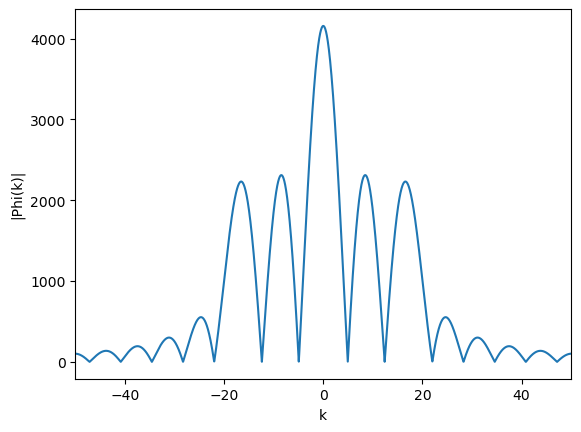

In [5]:
add = 100
xmin = 0 - add
xmax = 1 + add
N = 2**20
xs = numpy.linspace(xmin, xmax, N, endpoint=False)

psi = lambda x, n: numpy.sqrt(2) * numpy.sin(n * numpy.pi * x) * numpy.greater_equal(xs, 0) * numpy.less_equal(xs, 1)
psis: numpy.ndarray = 1 / numpy.sqrt(3) * (psi(xs, 1) + psi(xs, 3) + psi(xs, 5))

phis = numpy.fft.fft(psis)
phis_abs = numpy.absolute(phis)
phis_abs_order = numpy.fft.fftshift(phis_abs)
fs = numpy.fft.fftfreq(N, (xmax - xmin) / N)
ks = fs * 2 * numpy.pi
ks_order = numpy.fft.fftshift(ks)

plot.xlim(-50, 50)
plot.xlabel("k")
plot.ylabel("|Phi(k)|")
plot.plot(ks_order, phis_abs_order)
plot.show()


<div style="border: 2px solid black; padding: 10px;">
曲线几个较高的峰说明这个态具有较高的低动量成分，尤其在$k=0,k=\pm8.6,k=\pm18.5$附近的分量较大（FFT得到的频率乘$2\pi$得到物理上对应的$k$）。而其展宽以及在更高动量上的峰则是因为粒子被束缚在有限区间，波函数的性质在边界上发生跃变，这种跃变会产生高频的成分。（本题中取$\hbar=1$，$p=\hbar k=k$，不区分$p$与$k$的差别）。
</div>

在$t=0$时刻，我们将此一维无限深势阱移除，上述波函数$\Psi(x)$即为初始波函数，此后开始在自由空间中进行服从薛定谔方程的演化。已知动量空间中的一维薛定谔方程为：

$$ i\hbar\frac{\partial}{\partial t}\Phi(p,t)=\frac{p^2}{2m}\Phi(p,t)+\frac{1}{\sqrt{2\pi\hbar}}\int^\infty_{-\infty} \widetilde{V}(p-p')\Phi(p',t)dp'$$

其中$\widetilde{V}(p)=\frac{1}{\sqrt{2\pi\hbar}}\int^\infty_{-\infty}V(x)e^{-ipx}dx$是势能的傅里叶变换。
* 说明$\Phi_k$从t=0时刻起如何随时间变化
* 令$m=\hbar=1$，编写一个名为`Time_develop`的函数：输入$\Phi_k$序列与时间t，输出序列演化到t时刻的状态$\Phi_k(t)$
* 任意时刻t都可通过对$\Phi_k(t)$进行离散逆傅里叶变换来得到实空间波函数$\Psi_i(t)$，请自行调整合适的时间间隔$\Delta t$，在同一张图上作出$t=0,\Delta t,2\Delta t,3\Delta t$四个时刻通过这种方法得到的波函数$|\Psi (x, t)|$图像。（感兴趣的同学也可以尝试作出展现连续变化的动态图作为替代）

<div style="border: 2px solid black; padding: 10px;">
因为波函数在自由空间中演化，因此$\tilde{V}(p)=0$，在之后不同的$p$分量解耦，各自按照$i\hbar\frac{\partial}{\partial t}\Phi(k,t)=\frac{k^2}{2m}\Phi(k,t),\Phi(k,0)=\Phi_k$演化，其中$k$取分立值。简化符号，$\Phi_k(t)=\Phi_k\mathrm{e}^{-\frac{ik^2}{2m}t}$。
</div>

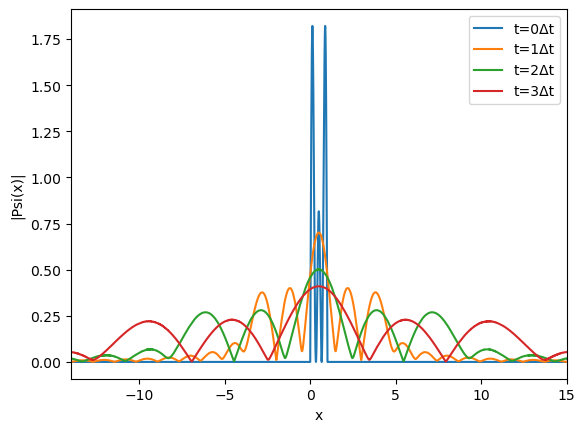

In [6]:
def Time_develop(phis: numpy.ndarray, ks: numpy.ndarray, t: numpy.complexfloating):
    phits = phis * numpy.exp(-1j * t * numpy.power(ks, 2) / 2)
    return phits


dt = 0.2
plot.xlim(-14, 15)
plot.xlabel("x")
plot.ylabel("|Psi(x)|")
for i in range(4):
    phits = Time_develop(phis, ks, i * dt)
    psits = numpy.fft.ifft(phits)
    psits_abs = numpy.abs(psits)
    plot.plot(xs, psits_abs, label=f't={i}Δt')
plot.legend()
plot.show()


#### **2.信号响应**

在物理实验中，我们测量的信号往往是真实信号与某种仪器响应函数的卷积。例如，当一个光探测器测量一个激光脉冲时，探测器输出的信号并非是理想的脉冲，而是真实脉冲与探测器自身响应对时间的卷积。在数学上可以表示为：
$$ S(t)=(S_0*R)(t)=\int^\infty_{-\infty}S_0(t')R(t-t')dt' $$

其中$S$是用仪器读取的信号，$S_0$是真实物理信号，$R$是仪器响应函数，通过卷积定理与FFT，我们可以非常高效地完成这一卷积计算。

假设一次实验中，待探测的真实信号与测量仪器的响应分别为：
$$ S_0(t)=0.9e^{-(t-1)^2/0.2}+0.5e^{-(t-3)^2/0.1}+0.3e^{-(t-6)^2/0.4} $$

$$ R(t)=\sqrt{\frac{2}{\pi}}e^{-t^2/0.5} $$

* 选择合适的时间离散化格点数$M$与$t_{min}, t_{max}$，在区间 $t \in [t_{min}, t_{max})$上将$S_0, R$离散化为$S_{0i}=S_0(t_i)$与$R_{i}=R(t_i)$。
* 调用FFT函数和逆FFT函数来完成对离散时间格点上$S_i=S(t_i)$的计算；在同一张图中绘制出$S_0(t),S(t)$**随时间t**的变化曲线。   
（提示：请注意计算过程中对归一化因子与时间离散化的正确处理，所作曲线不应在较大范围内改变上述可调参数时有显著变化）

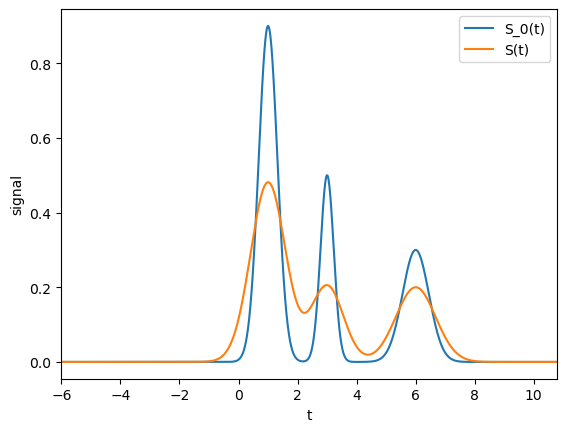

In [7]:
M = 2**16
N = 2 * M - 1
tmin = -6
tmax = 6 - 0.8 * tmin

S0 = lambda t: 0.9 * numpy.exp(-numpy.power(t - 1, 2) / 0.2) + 0.5 * numpy.exp(-numpy.power(t - 3, 2) / 0.1) + 0.3 * numpy.exp(-numpy.power(t - 6, 2) / 0.4)
R = lambda t: numpy.sqrt(2 / numpy.pi) * numpy.exp(-numpy.power(t, 2) / 0.5)

ts = numpy.linspace(tmin, tmax, M, endpoint=False)
ts_new = numpy.linspace(2 * tmin, 2 * tmax, N, endpoint=False)
S0ts = S0(ts)
Rts = R(ts)
S0fs = numpy.fft.fft(S0ts, n=N)
Rfs = numpy.fft.fft(Rts, n=N)
Sts = numpy.fft.ifft(S0fs * Rfs) * (ts[1] - ts[0])
Sts_real = numpy.real(Sts)
plot.xlim(tmin, tmax)
plot.xlabel("t")
plot.ylabel("signal")
plot.plot(ts, S0ts, label="S_0(t)")
plot.plot(ts_new, Sts_real, label="S(t)")
plot.legend()
plot.show()


* 你得到的两条曲线有什么关键的区别？如何从物理的角度加以解释？

<div style="border: 2px solid black; padding: 10px;">
探测到的脉冲信号相较于原始信号来说，峰的宽度显著增加，高度明显降低，相邻峰之间有部分重叠。从物理上来说，这个探测器的时间分辨率较低，高频的信号不能被及时响应，这导致本来尖锐的信号变得模糊，难以区分。
</div>

### 作业完成情况：

<div style="border: 2px solid black; padding: 10px;">
作业总共用时6小时左右，使用了ChatGPT。第一题花费时间不长；但是第二题用时较长，即使在ChatGPT的帮助下，第一问的“平滑且连续”和第二问的卷积后对应的时域坐标也都想了很长时间才理解。
</div>